In [1]:
import umap.umap_ as umap
import numpy as np
from sklearn.decomposition import PCA
from sklearn import preprocessing
from sklearn.svm import SVC
from sklearn.inspection import DecisionBoundaryDisplay

import matplotlib.pyplot as plt
import matplotlib.cm as cm

def scatter_plot(X,y,dict,train=True):
    
    handles = []
    cmap = cm.get_cmap('Dark2')
    colours = cmap(np.linspace(0,1,len(np.unique(y))))
    
    for i in np.unique(y):
        if train == True:
            ptch = plt.scatter(X[y==i,0],X[y==i,1],color=colours[i],marker='o',alpha=0.15)
            handles.append(ptch)
        else:
            ptch = plt.scatter(X[y==i,0],X[y==i,1],color=colours[i],marker='+')
    
    if train == True:
        plt.legend(handles, [dict[i] for i in range(len(np.unique(y)))])

label_dict = {
    0: "LP",
    1: "TC",
    2: "TR",
    3: "VT",
}

train_data = np.load('train_data.npy')
train_labs = np.load('train_labels.npy')
test_data = np.load('test_data.npy')
test_labs = np.load('test_labels.npy')

/home/mykhaylo/Documents/llaima/llaima/raw-fft-split-1/venv/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


/tmp/ipykernel_2250815/838989976.py:14: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('Dark2')


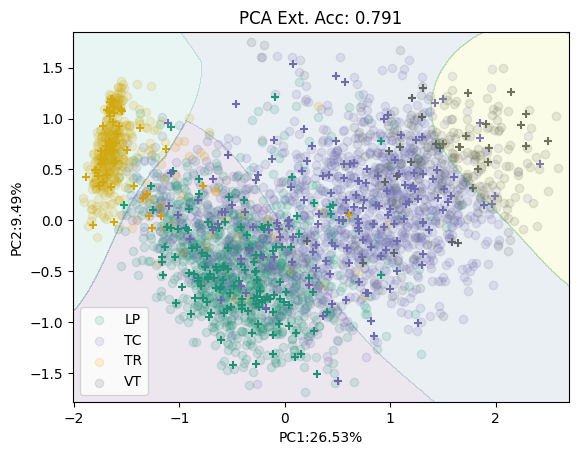

In [2]:
pca = PCA(n_components=2)
scaler = preprocessing.StandardScaler(with_std=False).fit(train_data)

train_data = scaler.transform(train_data)
test_data = scaler.transform(test_data)

scrs = pca.fit_transform(train_data)
scrs_test = pca.transform(test_data)

svc = SVC().fit(scrs, train_labs)
acc = svc.score(scrs_test, test_labs)

ax = plt.gca()

#plt.scatter(scrs[:,0], scrs[:,1], c=train_labs,alpha=0.1)
scatter_plot(scrs,train_labs,label_dict)
#plt.scatter(scrs_test[:,0],scrs_test[:,1],c=test_labs,marker='+',alpha=0.9)
scatter_plot(scrs_test,test_labs,label_dict,train=False)
plt.title(f'PCA Ext. Acc: {acc:.3f}')
plt.xlabel(f'PC1:{pca.explained_variance_ratio_[0]*100:.2f}%')
plt.ylabel(f'PC2:{pca.explained_variance_ratio_[1]*100:.2f}%')
DecisionBoundaryDisplay.from_estimator(
            svc, scrs, alpha=0.1, eps=0.1, ax = ax, grid_resolution=500
        )
plt.show()

UMAP(min_dist=0.6, n_neighbors=5, verbose=True)
Mon Jan 29 16:45:42 2024 Construct fuzzy simplicial set
Mon Jan 29 16:45:45 2024 Finding Nearest Neighbors
Mon Jan 29 16:45:48 2024 Finished Nearest Neighbor Search
Mon Jan 29 16:45:50 2024 Construct embedding


Epochs completed:  17%| █▋         86/500 [00:01]

	completed  0  /  500 epochs
	completed  50  /  500 epochs
	completed  100  /  500 epochs
	completed  150  /  500 epochs


Epochs completed:  47%| ████▋      237/500 [00:01]

	completed  200  /  500 epochs
	completed  250  /  500 epochs
	completed  300  /  500 epochs


Epochs completed:  95%| █████████▌ 476/500 [00:02]

	completed  350  /  500 epochs
	completed  400  /  500 epochs
	completed  450  /  500 epochs


Epochs completed: 100%| ██████████ 500/500 [00:02]


Mon Jan 29 16:45:52 2024 Finished embedding


Epochs completed: 100%| ██████████ 100/100 [00:01]

	completed  0  /  100 epochs
	completed  10  /  100 epochs
	completed  20  /  100 epochs
	completed  30  /  100 epochs
	completed  40  /  100 epochs
	completed  50  /  100 epochs
	completed  60  /  100 epochs
	completed  70  /  100 epochs
	completed  80  /  100 epochs
	completed  90  /  100 epochs



/tmp/ipykernel_2250815/838989976.py:14: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('Dark2')


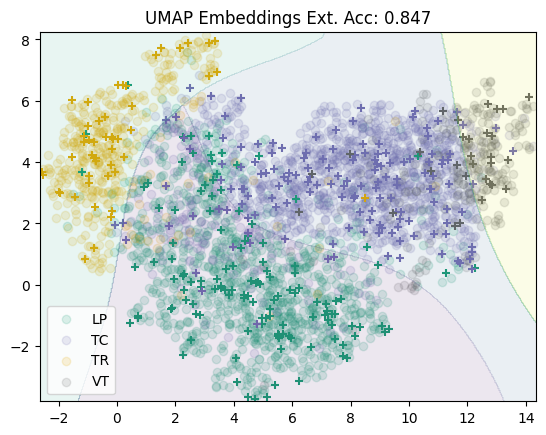

In [3]:
reducer_euclidean = umap.UMAP(n_components=2,
                              n_neighbors=5,
                              min_dist=0.6,
                              metric='euclidean',
                              verbose=True)

train_embds = reducer_euclidean.fit(train_data)
test_embds = reducer_euclidean.transform(test_data)

svc = SVC().fit(train_embds.embedding_, train_labs)
acc = svc.score(test_embds, test_labs)

ax = plt.gca()

#plt.scatter(train_embds.embedding_[:,0],train_embds.embedding_[:,1],c=train_labs,alpha=0.1)
scatter_plot(train_embds.embedding_,train_labs,label_dict)
#plt.scatter(test_embds[:,0],test_embds[:,1],c=test_labs,marker='+')
scatter_plot(test_embds,test_labs,label_dict,train=False)

plt.title(f'UMAP Embeddings Ext. Acc: {acc:.3f}')
DecisionBoundaryDisplay.from_estimator(
            svc, train_embds.embedding_, alpha=0.1, eps=0.1, ax = ax, grid_resolution=500
        )

plt.show()

UMAP(angular_rp_forest=True, metric='correlation', min_dist=0.6, n_neighbors=5, verbose=True)
Mon Jan 29 16:46:05 2024 Construct fuzzy simplicial set
Mon Jan 29 16:46:11 2024 Finding Nearest Neighbors
Mon Jan 29 16:46:11 2024 Finished Nearest Neighbor Search
Mon Jan 29 16:46:11 2024 Construct embedding


Epochs completed:  13%| █▎         64/500 [00:01]

	completed  0  /  500 epochs
	completed  50  /  500 epochs
	completed  100  /  500 epochs


Epochs completed:  47%| ████▋      233/500 [00:01]

	completed  150  /  500 epochs
	completed  200  /  500 epochs
	completed  250  /  500 epochs


Epochs completed:  79%| ███████▉   394/500 [00:02]

	completed  300  /  500 epochs
	completed  350  /  500 epochs
	completed  400  /  500 epochs
	completed  450  /  500 epochs


Epochs completed: 100%| ██████████ 500/500 [00:02]


Mon Jan 29 16:46:13 2024 Finished embedding


Epochs completed: 100%| ██████████ 100/100 [00:01]

	completed  0  /  100 epochs
	completed  10  /  100 epochs
	completed  20  /  100 epochs
	completed  30  /  100 epochs
	completed  40  /  100 epochs
	completed  50  /  100 epochs
	completed  60  /  100 epochs
	completed  70  /  100 epochs
	completed  80  /  100 epochs
	completed  90  /  100 epochs



/tmp/ipykernel_2250815/838989976.py:14: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('Dark2')


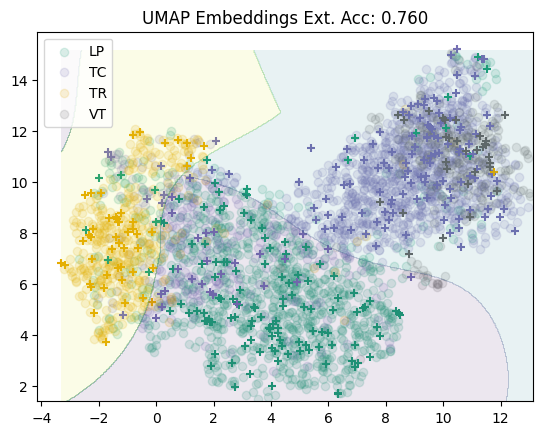

In [4]:
reducer_correlation = umap.UMAP(n_components=2,
                              n_neighbors=5,
                              min_dist=0.6,
                              metric='correlation',
                              verbose=True)

train_embds = reducer_correlation.fit(train_data)
test_embds = reducer_correlation.transform(test_data)

svc = SVC().fit(train_embds.embedding_, train_labs)
acc = svc.score(test_embds, test_labs)

ax = plt.gca()

#plt.scatter(train_embds.embedding_[:,0],train_embds.embedding_[:,1],c=train_labs,alpha=0.1)
scatter_plot(train_embds.embedding_,train_labs,label_dict)
#plt.scatter(test_embds[:,0],test_embds[:,1],c=test_labs,marker='+')
scatter_plot(test_embds,test_labs,label_dict,train=False)

plt.title(f'UMAP Embeddings Ext. Acc: {acc:.3f}')
DecisionBoundaryDisplay.from_estimator(
            svc, train_embds.embedding_, alpha=0.1, eps=0.1, ax = ax, grid_resolution=500
        )
plt.show()